In [110]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.pylab as plt_lab
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn import model_selection

from glob import glob
import cv2

import os

In [111]:
img_categories = os.listdir("realwaste-main/RealWaste")
img_categories = [c for c in trash_dirs if c[0] != '.']
img_categories

img_paths = {}
for cat in img_categories:
    img_paths[cat] = glob(f"realwaste-main/RealWaste/{cat}/*.jpg")

img_counts = {}
for cat in img_categories:
    img_counts[cat] = len(img_paths[cat])
img_counts

img_counts_df = pd.DataFrame.from_dict(img_counts, orient='index', columns=["count"])
img_counts_df.reset_index(inplace=True, names="category")
img_counts_df

,category,count
0,Paper,500
1,Textile,318
2,Metal,790
3,Cardboard,461
4,Miscellaneous,495
5,Food Organics,411
6,Glass,420
7,Vegetation,436
8,Plastic,921


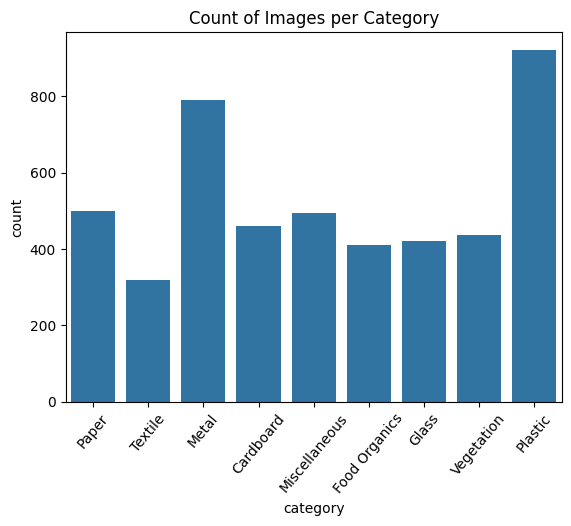

In [112]:
sns.barplot(img_counts_df, x="category", y="count")
plt.title("Count of Images per Category")
plt.xticks(rotation=50)
plt.show()

In [113]:
cardboard = img_paths['Cardboard']
# cardboard

In [114]:
img_mpl = plt.imread(cardboard[0])
img_mpl.shape

(524, 524, 3)

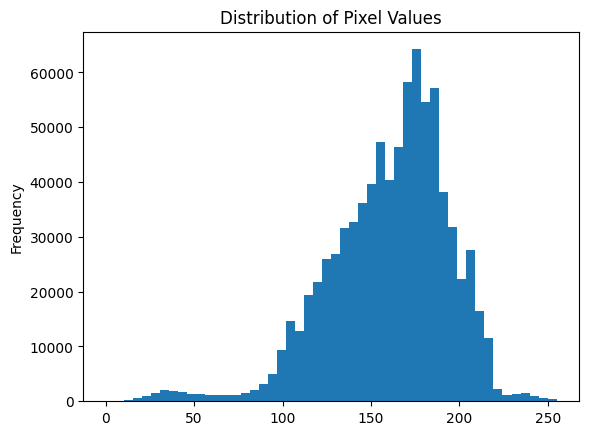

In [115]:
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title='Distribution of Pixel Values')
plt.show()

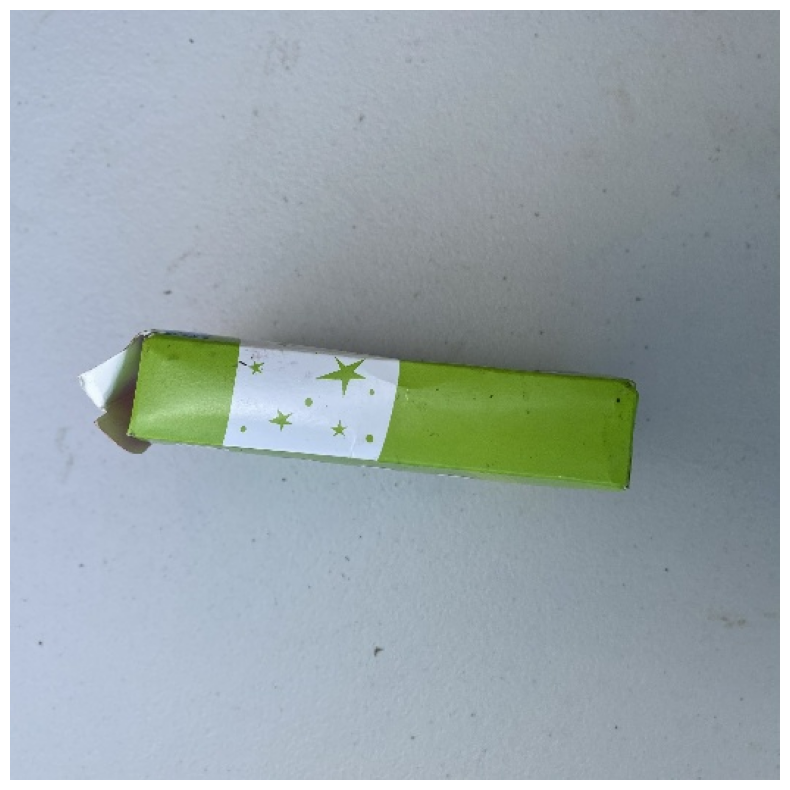

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

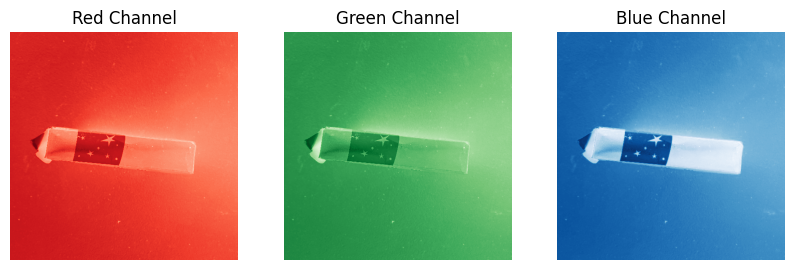

In [117]:
colors = ["Reds", "Greens", "Blues"]

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_mpl[:,:,i], cmap=colors[i])
    ax.axis('off')
    ax.set_title(colors[i][:-1] + " Channel")
plt.show()

In [118]:
def img_data_avgs(img_data, num_bins):
    color_img_data = pd.Series(img_mpl[:,:,i].flatten())
    color_img_data
    
    img_data_avgs = []
    curr_val_count = 0
    img_data = []
    for val in color_img_data:
        if curr_val_count == num_bins:
            img_data_avgs.append(np.mean(img_data))
            img_data = []
            curr_val_count = 0
        else:
            curr_val_count += 1
            img_data.append(val)

    return img_data_avgs

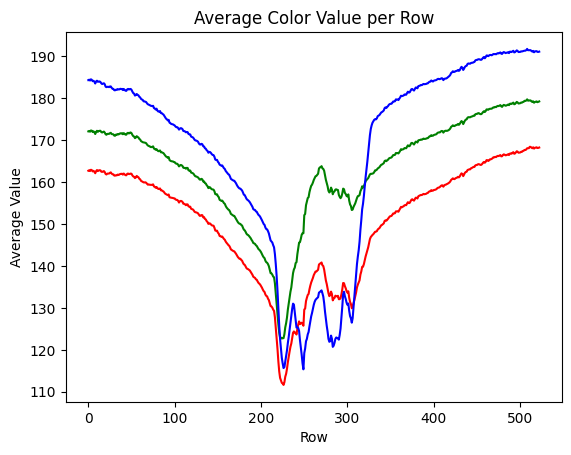

In [126]:
num_bins = 524 # avg color value for each row

for i in range(len(colors)):
    color_img_data = pd.Series(img_mpl[:,:,i].flatten())
    img_avgs = img_data_avgs(color_img_data, 524)
    
    sns.lineplot(data=img_avgs, color=colors[i][:-1])
    plt.title("Average Color Value per Row")
    plt.xlabel("Row")
    plt.ylabel("Average Value")
plt.show()